In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset (replace 'house_data.csv' with your actual dataset)
df = pd.read_csv("data/house_data.csv")  # If file is in a data subfolder

In [3]:
# List of binary columns to convert
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'prefarea']

In [4]:
# Convert all 'yes'/'no' columns to 1/0
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [5]:
# Optional: Convert furnishingstatus to numerical (0,1,2)
df['furnishingstatus'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

In [6]:
# Check dataset
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


In [7]:
# Select features (X) and target (y)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus',]]  # Change based on your dataset
y = df['price']

In [8]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict on test set
y_pred = model.predict(X_test)

In [11]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

MAE: 979679.6912959905
MSE: 1771751116594.035
R² Score: 0.6494754192267804


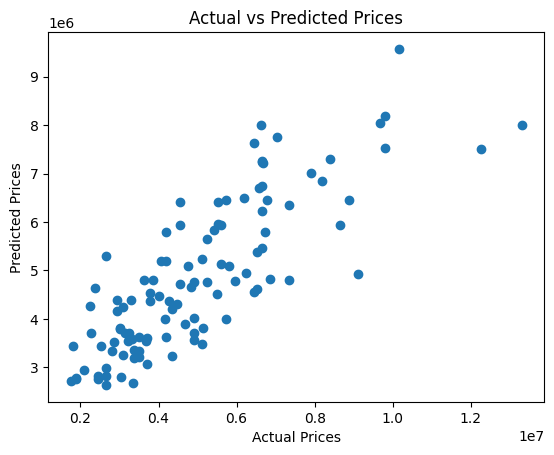

In [13]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [21]:
import joblib

# Save the trained model
joblib.dump(model, 'backend/house_price_model.pkl')
print("Model saved to ../backend/house_price_model.pkl")


Model saved to ../backend/house_price_model.pkl
